In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import sweetviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [6]:
bills=pd.read_csv("fake_bills.csv")

In [7]:
bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [8]:
bills.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [9]:
bills=bills.sample(frac=1)

In [10]:
bills.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
873        True    172.29       103.93        103.82        4.25       3.11   
848        True    172.44       104.26        103.56        3.48       3.12   
893        True    172.20       103.52        103.78        3.66       3.40   
863        True    171.97       104.00        103.37        3.86       3.21   
660        True    172.14       104.01        104.00        3.64       3.16   

     length  
873  113.54  
848  112.70  
893  113.35  
863  112.87  
660  113.37

In [11]:
from sklearn.utils import shuffle

In [12]:
bills=shuffle(bills)

In [13]:
bills.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
546         True    171.73       103.76        103.91        4.28       3.17   
1033       False    171.72       104.06        103.80        5.69       3.64   
1380       False    171.58       103.87        104.07        4.67       3.51   
770         True    171.80       104.17        103.80        4.67       2.88   
230         True    172.32       103.22        104.00        4.01       3.08   

      length  
546   113.09  
1033  111.77  
1380  111.53  
770   113.03  
230   112.87

In [14]:
bills.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [15]:
bills.shape

(1500, 7)

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_14080\1300957700.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bills["margin_low"])


<Axes: xlabel='margin_low', ylabel='Density'>

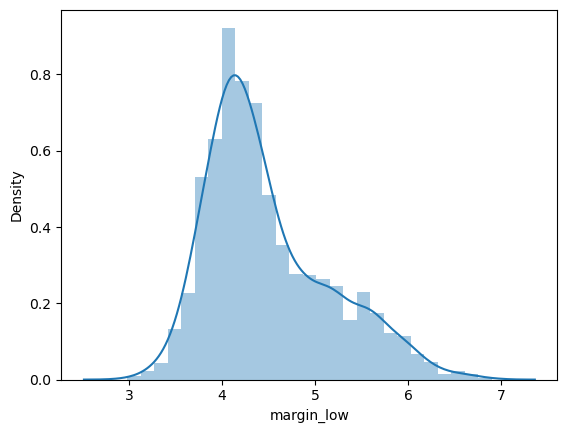

In [17]:
sns.distplot(bills["margin_low"])

In [19]:
def pearskew(col):
    m1=bills[col].mean()
    m2=bills[col].median()
    m3=bills[col].std()
    s1=m1-m2
    s2=3*s1
    s3=s2/3
    return s3

In [21]:
pearskew("margin_low")

0.175967190704033

In [22]:
bills["margin_low"]=bills["margin_low"].fillna(bills["margin_low"].mean())

In [23]:
bills.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Axes: xlabel='is_genuine', ylabel='Count'>

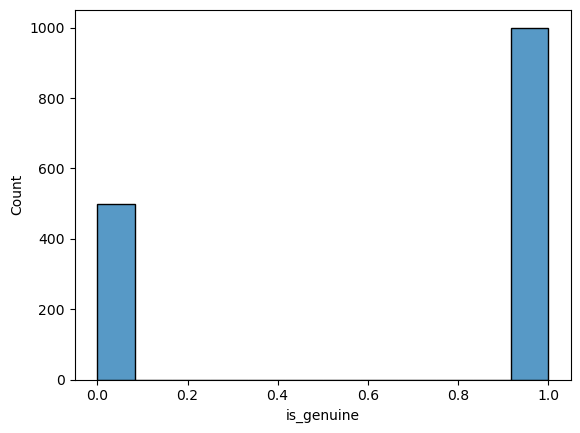

In [25]:
sns.histplot(bills["is_genuine"])

In [31]:
def scatter(x,y,n):
    plt.subplot(3,1,n)
    sns.scatterplot(data=bills,x=x,y=y,hue=bills["is_genuine"])
    plt.xlabel(x)
    plt.ylabel(x)

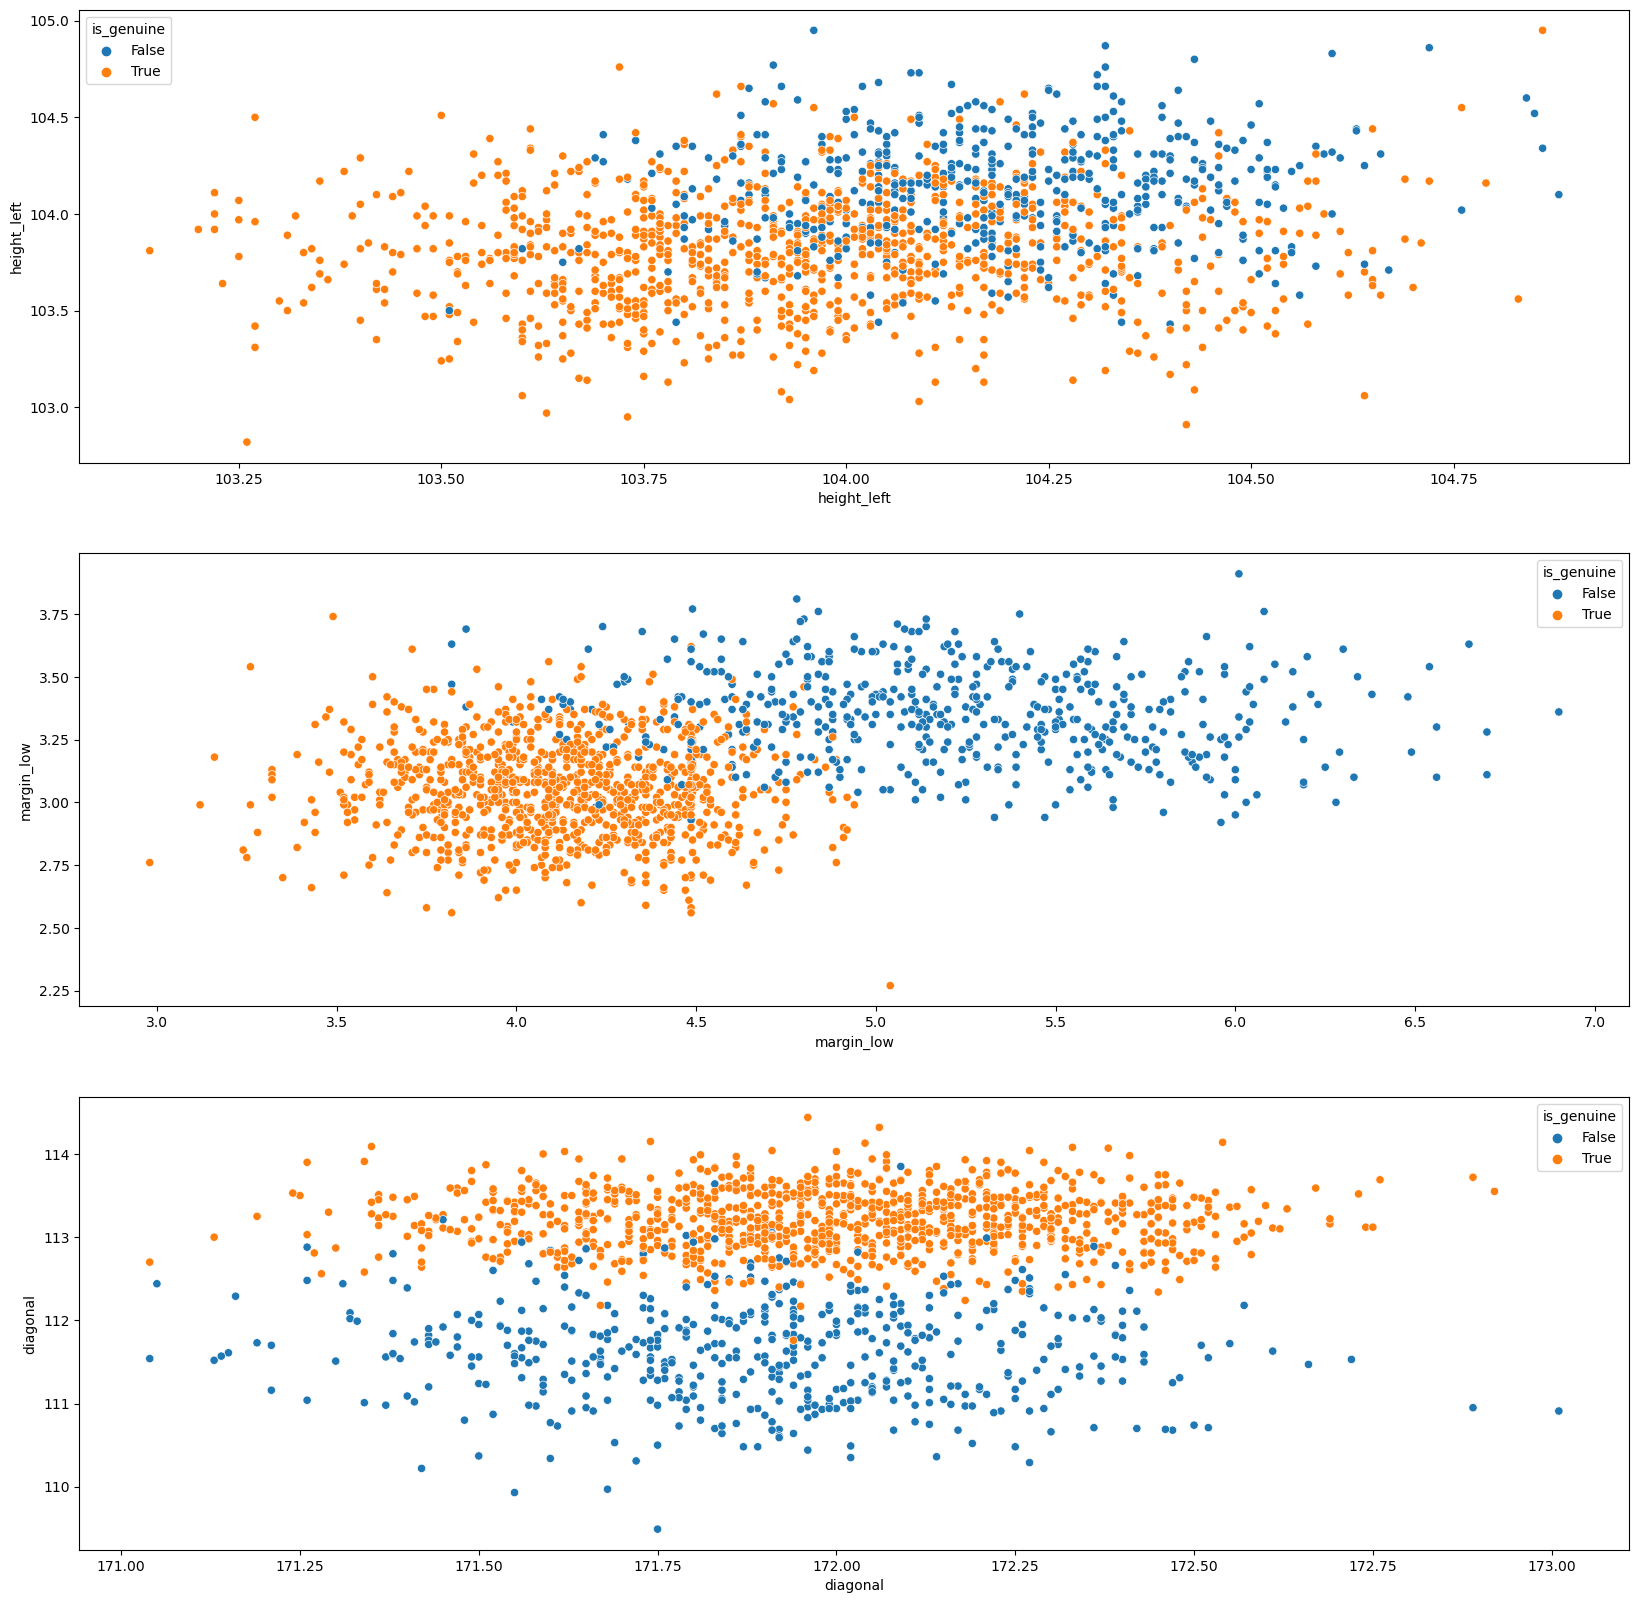

In [32]:
plt.figure(figsize=(20,20))

scatter("height_left","height_right",1)

scatter("margin_low","margin_up",2)


scatter("diagonal","length",3)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


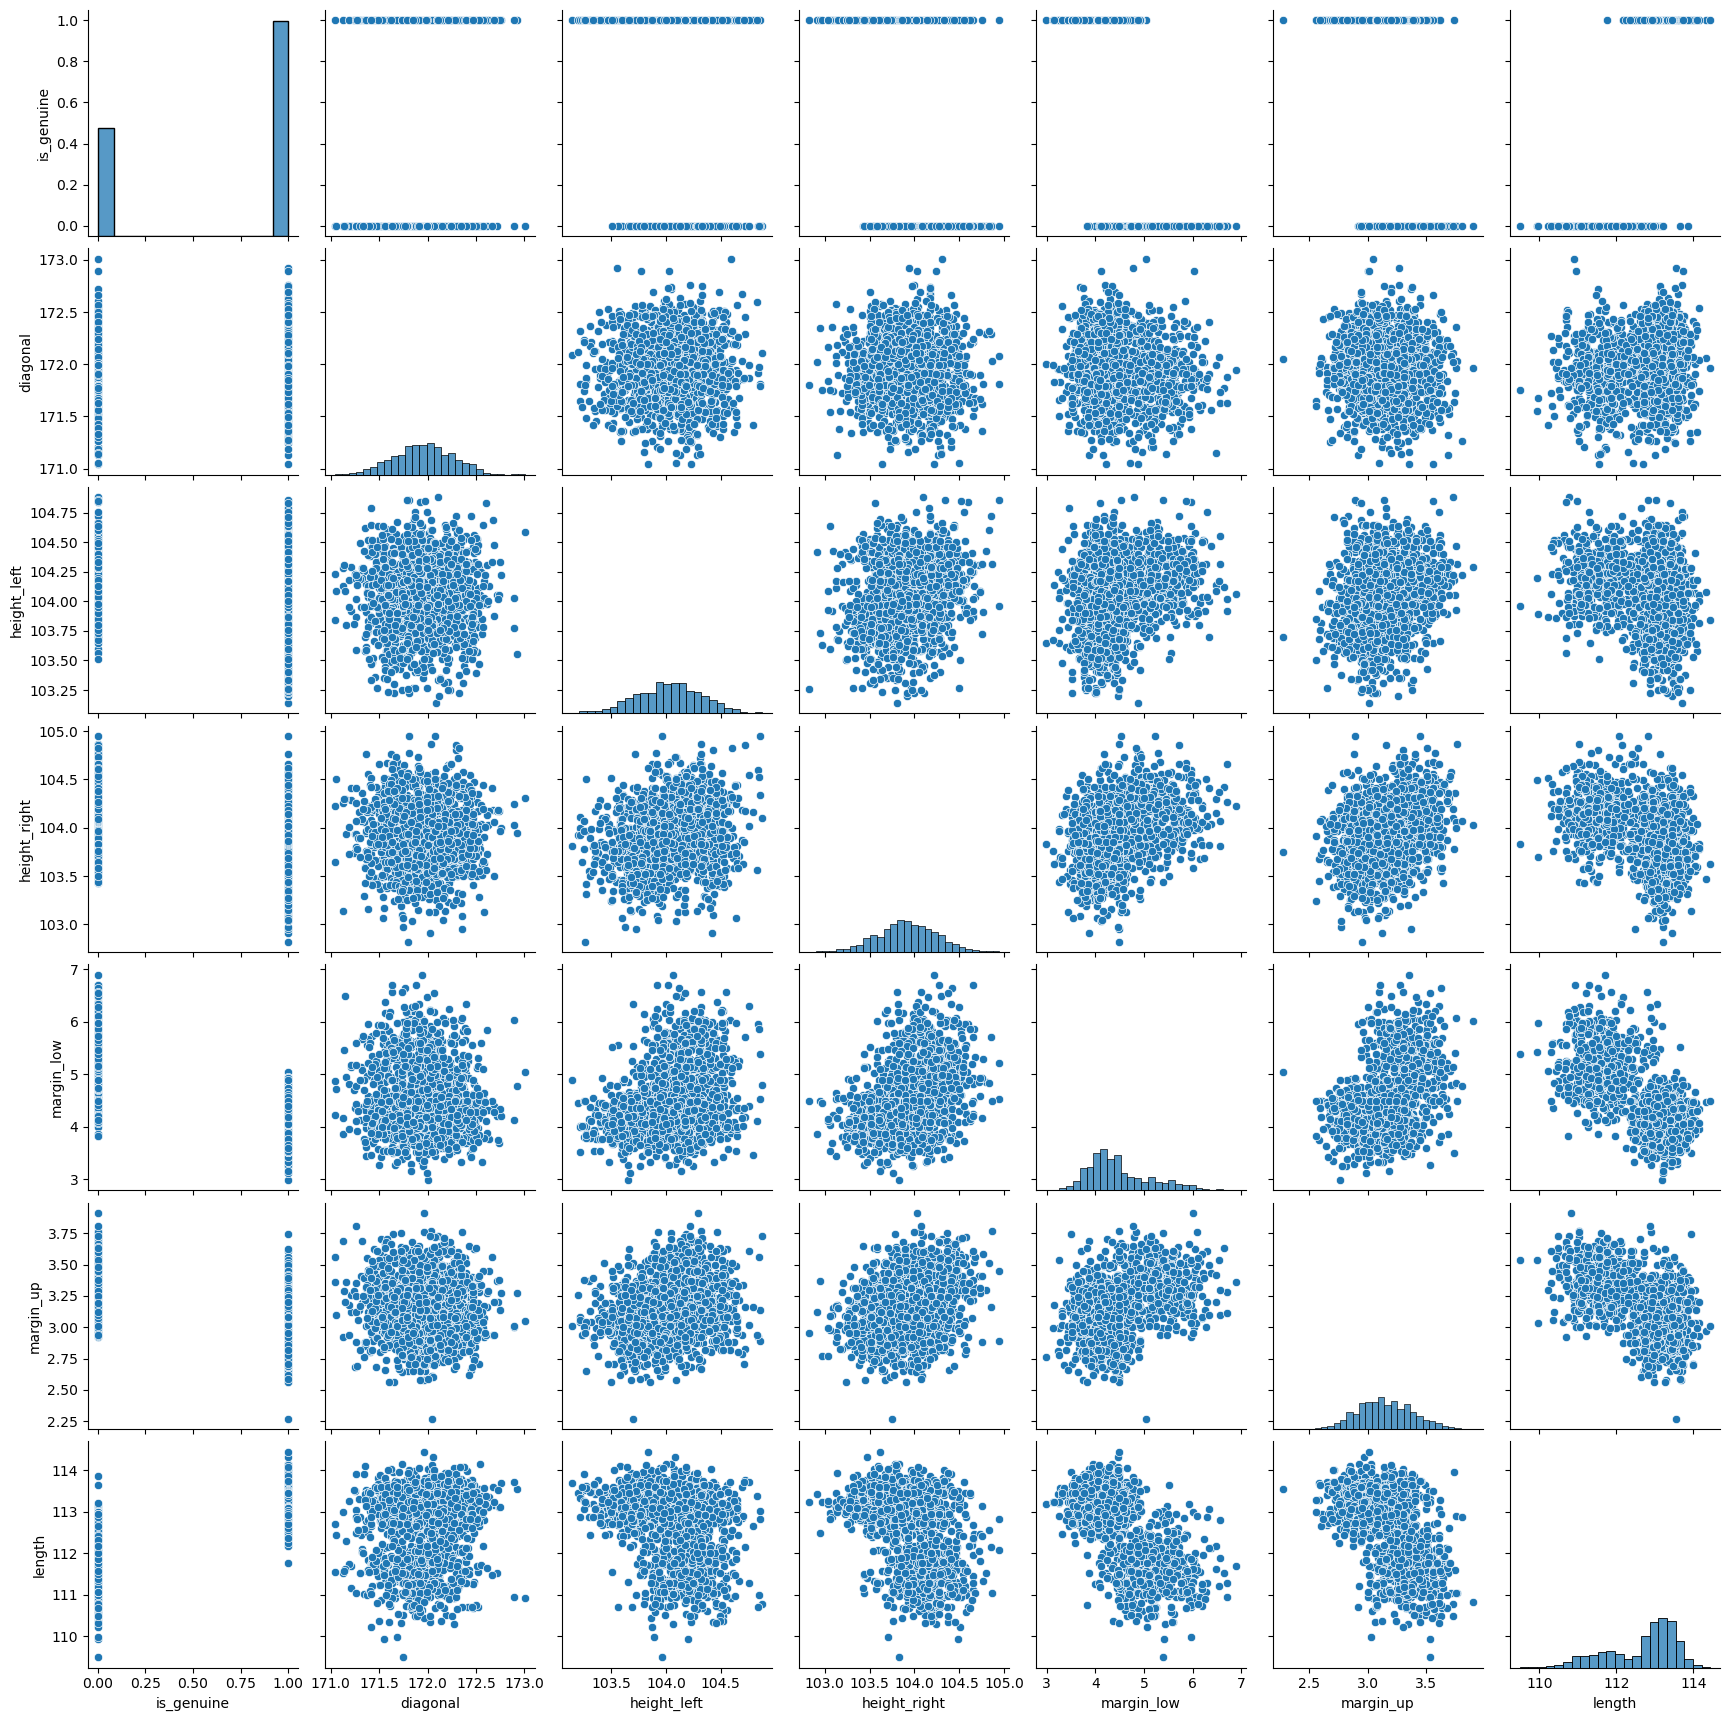

In [33]:
sns.pairplot(bills)
plt.show()

<Axes: >

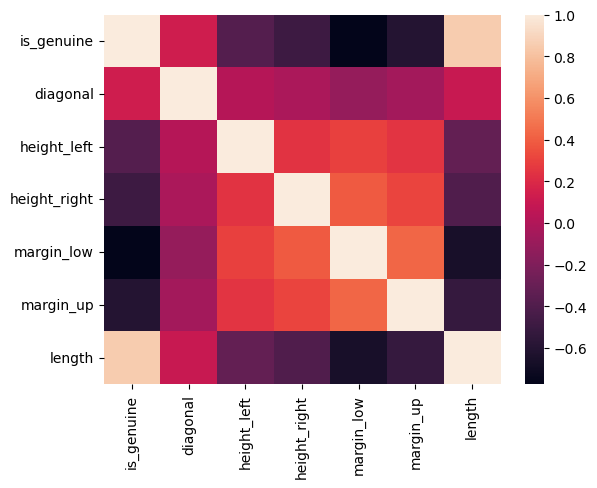

In [34]:
corr=bills.corr()
sns.heatmap(corr)

In [36]:
pp.ProfileReport(bills)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
fc=sweetviz.FeatureConfig(force_cat="is_genuine")

In [39]:
bills.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.655569     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.030000     2.990000   
50%     171.960000   104.040000    103.920000     4.330000     3.140000   
75%     172.170000   104.230000    104.150000     4.860000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [43]:
bills_train, bills_test = train_test_split(bills, random_state=104,test_size=0.25)

In [47]:
my_report=sweetviz.compare(bills_train,bills_test,None,fc)

C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:84: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_compare_names = [cur_name for cur_name, cur_series in compare_df.iteritems()]
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To c

In [48]:
my_report.show_html("Fake_bills.html")

Report Fake_bills.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [49]:
X=bills.drop("is_genuine",axis=1)
y=bills["is_genuine"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104,test_size=0.25)

In [52]:
log=LogisticRegression()

In [54]:
log.fit(X_train,y_train)

LogisticRegression()

In [56]:
y_pred=log.predict(X_test)

In [58]:
score = log.score(X_test, y_test)
print(score)

0.9893333333333333


In [65]:
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[132   1]
 [  3 239]]


In [66]:
ps=precision_score(y_test,y_pred)
print(ps)

0.987603305785124


In [67]:
rs=recall_score(y_test,y_pred)
print(rs)

0.9958333333333333


In [68]:
def ckmodel(X,y):
    lm=sm.Logit(y,X).fit()
    print(lm.summary())
    return X

def fact(X):
    newset=pd.DataFrame()
    newset['Features']=X.columns
    newset['factor']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    newset['factor'] = round(newset['factor'], 2)
    newset = newset.sort_values(by = "factor", ascending = False)
    return(newset)

In [69]:
X_train_new = ckmodel(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.028129
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1125
Model:                          Logit   Df Residuals:                     1119
Method:                           MLE   Df Model:                            5
Date:                Tue, 18 Jul 2023   Pseudo R-squ.:                  0.9554
Time:                        16:39:44   Log-Likelihood:                -31.645
converged:                       True   LL-Null:                       -708.95
Covariance Type:            nonrobust   LLR p-value:                9.450e-291
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
diagonal         0.0729      0.757      0.096      0.923      -1.410       1.556
height_left     -1.825

In [70]:
fact(X_train_new)

Features     factor
0      diagonal  173779.84
1   height_left  117187.02
2  height_right  101993.27
5        length   31564.99
4     margin_up     271.10
3    margin_low      91.04

In [71]:
X_train_new=X_train_new.drop("diagonal",axis=1)

In [72]:
X_train_new = ckmodel(X_train_new,y_train)

Optimization terminated successfully.
         Current function value: 0.028133
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1125
Model:                          Logit   Df Residuals:                     1120
Method:                           MLE   Df Model:                            4
Date:                Tue, 18 Jul 2023   Pseudo R-squ.:                  0.9554
Time:                        16:41:24   Log-Likelihood:                -31.650
converged:                       True   LL-Null:                       -708.95
Covariance Type:            nonrobust   LLR p-value:                4.846e-292
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
height_left     -1.7791      1.147     -1.550      0.121      -4.028       0.470
height_right    -3.295

In [73]:
fact(X_train_new)

Features    factor
0   height_left  82916.79
1  height_right  78696.88
4        length  25320.79
3     margin_up    270.96
2    margin_low     90.97